# Code for the assignment

In [1]:
import networkx as nx
import numpy as np
import scipy as sp
from random import choice, sample
import sys
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

## Epidemic on a known graph

### Problem 1.1

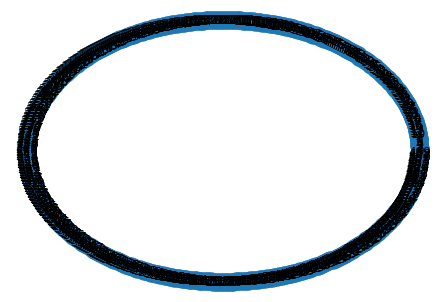

In [2]:
n_nodes = 500
k_regular = nx.circulant_graph(n_nodes, [1,2])
nx.draw_circular(k_regular, with_labels=True)
#[n for n in k_regular.neighbors(300)]

In [92]:
def simulate(graph, n_nodes, initial_infected, n_simulations, n_weeks, beta, ro):

  # Vectors for storing a particular type of node:
  # i^th row corresponds to the i^th simulation,
  # j^th column corresponds to the j^th week
  susceptible_nodes = np.empty((n_simulations, n_weeks), dtype=int)
  infected_nodes = np.empty((n_simulations, n_weeks), dtype=int)
  recovered_nodes = np.empty((n_simulations, n_weeks), dtype=int)
  new_infected_nodes = np.empty((n_simulations, n_weeks), dtype=int)

  # 10 initial infected nodes at weak 0 of each simulation
  infected_nodes[:, 0] = initial_infected
  new_infected_nodes[:, 0] = initial_infected
  susceptible_nodes[:, 0] = n_nodes - initial_infected
  recovered_nodes[:, 0] = 0

  for simulation in range(n_simulations):
    # The node configuration has a column for the old and the updated configuration
    nodes_configuration = np.zeros((n_nodes, 2), dtype=int)
    #initial_infected_nodes = sample(graph.nodes(), initial_infected)
    initial_infected_nodes = np.random.choice(graph.nodes, size=(initial_infected,),replace=False)

    for node in initial_infected_nodes:
      nodes_configuration[node, 0] = 1

    for week in range(n_weeks):
      weekly_susceptible_nodes = 0
      weekly_infected_nodes = 0
      weekly_recovered_nodes = 0
      weekly_new_infected_nodes = 0


      for node in graph.nodes:
        if nodes_configuration[node, 0] == 0:
          m = 0
          # Count neighbours that are I
          for neighbour in graph.neighbors(node):
            if nodes_configuration[neighbour, 0] == 1:
              m+=1
          if np.random.random(1)[0] < (1-beta)**m:
            nodes_configuration[node, 1] = 0
            weekly_susceptible_nodes += 1
          else:
            nodes_configuration[node, 1] = 1
            weekly_infected_nodes += 1
            weekly_new_infected_nodes += 1


          """prob_not_I = (1-beta)**m
          probs = [prob_not_I, 1-prob_not_I]
          nodes_configuration[node, 1] = np.random.choice([0, 1], size=1, p=probs, replace=False)
          #print(np.random.choice([0, 1], size=1, p=probs, replace=False))
          if nodes_configuration[node, 1] == 1:
            weekly_infected_nodes += 1
            weekly_new_infected_nodes += 1
          else:
            weekly_susceptible_nodes += 1"""

        elif nodes_configuration[node, 0] == 1:

          if np.random.random(1)[0]< ro:
            nodes_configuration[node, 1] = 2
            weekly_recovered_nodes += 1
          else:
            nodes_configuration[node, 1] = 1
            weekly_infected_nodes += 1

          """probs = [1-ro, ro]
          nodes_configuration[node, 1] = np.random.choice([1, 2], size=1, p=probs, replace=False)          
          if nodes_configuration[node, 1] == 2:
            weekly_recovered_nodes += 1
          else:
            weekly_infected_nodes += 1"""

        else:
          nodes_configuration[node, 1] = 2
          weekly_recovered_nodes += 1
      #print(weekly_susceptible_nodes, weekly_infected_nodes, weekly_recovered_nodes, weekly_new_infected_nodes)

      infected_nodes[simulation, week] = weekly_infected_nodes
      susceptible_nodes[simulation, week] = weekly_susceptible_nodes
      recovered_nodes[simulation, week] = weekly_recovered_nodes
      new_infected_nodes[simulation, week] = weekly_new_infected_nodes
      nodes_configuration[:, 0] = nodes_configuration[:, 1]
      #print(infected_nodes)
      #print(infected_nodes.shape)
      #sys.exit()

  infected_nodes_avg = np.mean(infected_nodes, axis=0)
  susceptible_nodes_avg = np.mean(susceptible_nodes, axis=0)
  recovered_nodes_avg = np.mean(recovered_nodes, axis=0)
  new_infected_nodes_avg = np.mean(new_infected_nodes, axis=0) 

  return infected_nodes_avg, susceptible_nodes_avg, recovered_nodes_avg, new_infected_nodes_avg

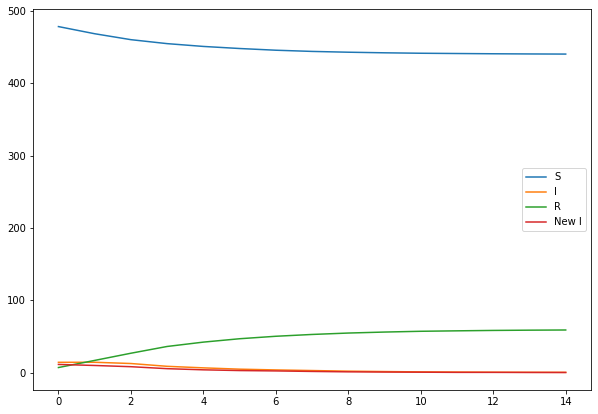

In [93]:
# graph, n_nodes, initial_infected, n_simulations, n_weeks, beta, ro
infected_nodes_avg, susceptible_nodes_avg, recovered_nodes_avg, new_infected_nodes_avg = simulate(k_regular, n_nodes, 10, 100, 15, 0.3, 0.7)
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(susceptible_nodes_avg, label='S')
ax.plot(infected_nodes_avg, label='I')
ax.plot(recovered_nodes_avg, label='R')
ax.plot(new_infected_nodes_avg, label='New I')
ax.legend(loc='best');